In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

In [14]:
sc._settings.ScanpyConfig.n_jobs = -1

In [35]:
def z_score_normalization(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

def reorder_columns(df, col_changed, col_position) -> pd.DataFrame:
    """
    Reordering colums. The second input can either be an integer for index or it can be a reference column name. If reference column name is chosen, the column will be placed after the reference column.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The first argument must be a pandas DataFrame")
    if not isinstance(col_changed, str):
        raise ValueError("The second argument must be a string representing a column name")
    if not isinstance(col_position, (str, int)):
        raise ValueError("The third argument must be either a string representing a column name or an integer representing a column index")
    if isinstance(col_position, int):
        cols = df.columns.tolist()
        if col_changed in cols and col_position <= len(cols) + 1:
            cols.remove(col_changed)
        
            index = col_position
            cols.insert(index, col_changed)
            
            df = df[cols]
    else:
        cols = df.columns.tolist()
        if col_changed in cols and col_position in cols:
            cols.remove(col_changed)
            index = cols.index(col_position)
            cols.insert(index+1, col_changed)
            
            df = df[cols]
    return df

In [39]:
df = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/Maps_data/cHL_1_MIBI/quantification/cHL1_MIBI.csv')

In [40]:
df = reorder_columns(df, 'cellLabel', 'identifier')
df = reorder_columns(df, 'Annotation', 'cellLabel')
df.rename(columns={'Annotation': 'cell_type'}, inplace=True)
df.drop(columns=['centroidX', 'centroidY', 'cellLabel'], inplace=True)

In [41]:
df

,CD45,CD20,CD163,Histone H3,CD45RO,CD28,CD153 (CD30L),Lag3,CD4,CD11c,...,CD30,TIM3,RORgT,TCRgd,CD86,CD25,Na-K ATPase,cellSize,identifier,cell_type
0,0.001217,0.016976,0.131463,0.192797,0.001151,0.000207,0.000074,0.000160,0.001707,0.000000,...,0.000000,0.001195,0.000785,0.000921,0.001140,0.001094,0.003093,249,31,M2
1,0.000000,0.000000,0.024141,0.202666,0.000945,0.000000,0.000000,0.000112,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000307,0.000030,0.001797,22,31,M2
2,0.000451,0.000000,0.040998,0.051099,0.003537,0.000000,0.000000,0.000000,0.002056,0.000000,...,0.000000,0.000010,0.000205,0.000214,0.000653,0.001518,0.005575,35,31,M2
3,0.000000,0.000000,0.159136,0.057322,0.000526,0.000000,0.000000,0.000000,0.000156,0.000000,...,0.000000,0.000262,0.000000,0.000328,0.000456,0.000939,0.004156,29,31,M2
4,0.000000,0.000000,0.117901,0.072533,0.003073,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000030,0.000000,0.000702,0.000378,0.001069,0.008932,14,31,M2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669848,0.000345,0.000000,0.002531,0.196096,0.001716,0.000462,0.002012,0.000046,0.006395,0.005166,...,0.000003,0.000364,0.000058,0.000490,0.000726,0.000953,0.005393,145,6,Neutrophil
1669849,0.000205,0.000000,0.000139,0.184302,0.001173,0.000058,0.006320,0.000045,0.000000,0.000000,...,0.000000,0.000000,0.000242,0.000564,0.000394,0.000344,0.001827,36,6,Neutrophil
1669850,0.000812,0.000608,0.000000,0.179846,0.001337,0.000555,0.002020,0.000016,0.003382,0.000000,...,0.000000,0.000012,0.000111,0.000868,0.000354,0.000809,0.004953,44,6,Neutrophil
1669851,0.000000,0.000000,0.000000,0.080264,0.000978,0.000000,0.001857,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000150,0.000395,0.000022,0.001163,29,6,Neutrophil


In [42]:

df.to_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/Maps_data/cHL_1_MIBI/quantification/processed/cHL1_MIBI_cleaned.csv', index=False)

In [43]:
df

,CD45,CD20,CD163,Histone H3,CD45RO,CD28,CD153 (CD30L),Lag3,CD4,CD11c,...,CD30,TIM3,RORgT,TCRgd,CD86,CD25,Na-K ATPase,cellSize,identifier,cell_type
0,0.001217,0.016976,0.131463,0.192797,0.001151,0.000207,0.000074,0.000160,0.001707,0.000000,...,0.000000,0.001195,0.000785,0.000921,0.001140,0.001094,0.003093,249,31,M2
1,0.000000,0.000000,0.024141,0.202666,0.000945,0.000000,0.000000,0.000112,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000307,0.000030,0.001797,22,31,M2
2,0.000451,0.000000,0.040998,0.051099,0.003537,0.000000,0.000000,0.000000,0.002056,0.000000,...,0.000000,0.000010,0.000205,0.000214,0.000653,0.001518,0.005575,35,31,M2
3,0.000000,0.000000,0.159136,0.057322,0.000526,0.000000,0.000000,0.000000,0.000156,0.000000,...,0.000000,0.000262,0.000000,0.000328,0.000456,0.000939,0.004156,29,31,M2
4,0.000000,0.000000,0.117901,0.072533,0.003073,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000030,0.000000,0.000702,0.000378,0.001069,0.008932,14,31,M2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669848,0.000345,0.000000,0.002531,0.196096,0.001716,0.000462,0.002012,0.000046,0.006395,0.005166,...,0.000003,0.000364,0.000058,0.000490,0.000726,0.000953,0.005393,145,6,Neutrophil
1669849,0.000205,0.000000,0.000139,0.184302,0.001173,0.000058,0.006320,0.000045,0.000000,0.000000,...,0.000000,0.000000,0.000242,0.000564,0.000394,0.000344,0.001827,36,6,Neutrophil
1669850,0.000812,0.000608,0.000000,0.179846,0.001337,0.000555,0.002020,0.000016,0.003382,0.000000,...,0.000000,0.000012,0.000111,0.000868,0.000354,0.000809,0.004953,44,6,Neutrophil
1669851,0.000000,0.000000,0.000000,0.080264,0.000978,0.000000,0.001857,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000150,0.000395,0.000022,0.001163,29,6,Neutrophil


In [27]:
X_columns = df.columns[:df.columns.get_loc('centroidX')]
obs_columns = df.columns[df.columns.get_loc('centroidX'):]
adata = ad.AnnData(
    X=df[X_columns],
    obs=df[obs_columns],
    var=pd.DataFrame(index=X_columns)
)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [28]:
adata.raw = adata
adata.X = np.arcsinh(adata.X)
adata.layers['zscore'] = z_score_normalization(adata.X)

In [34]:
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

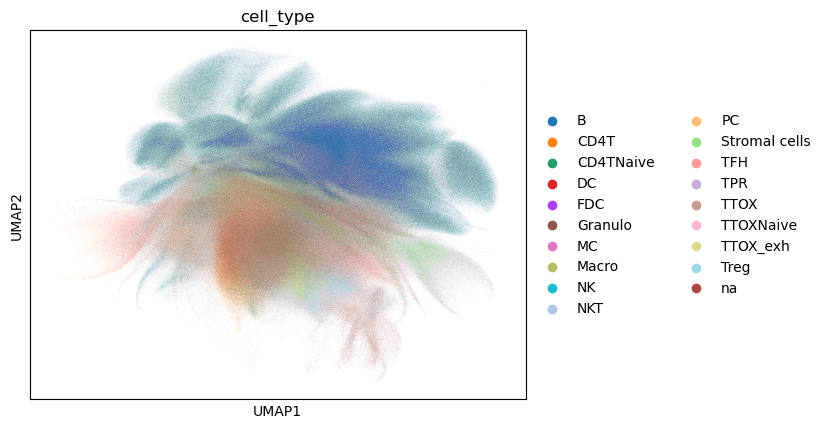

In [18]:
sc.pl.umap(adata, color='cell_type')

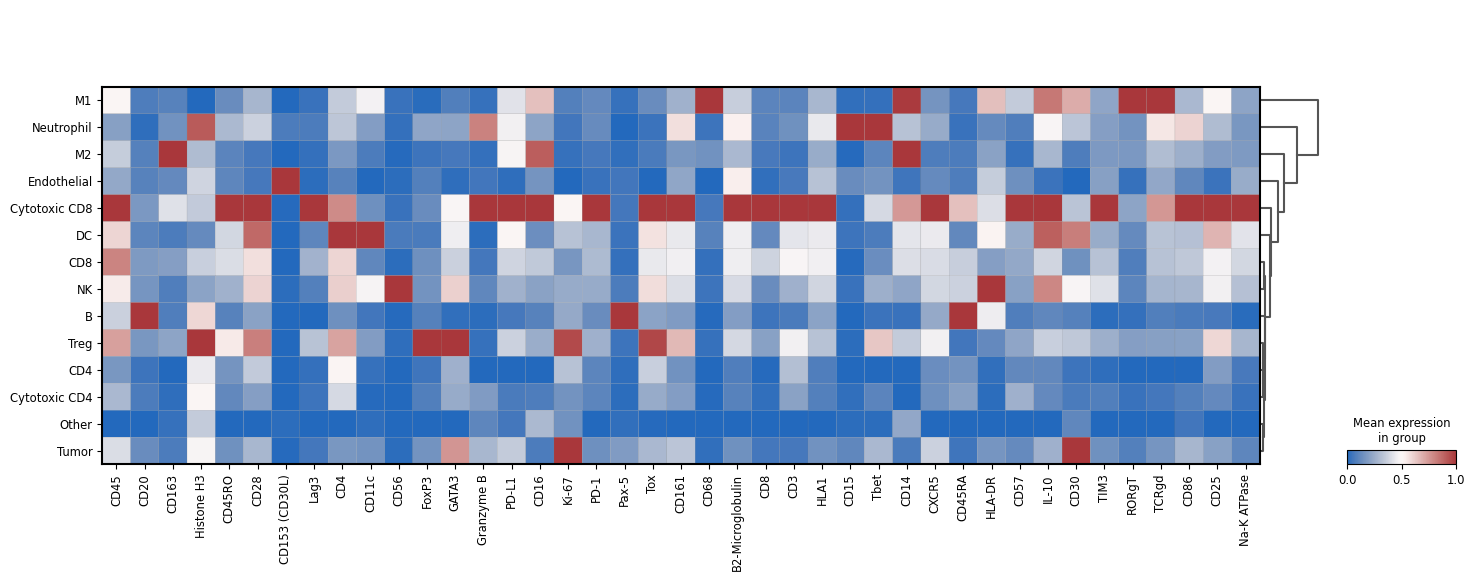

In [29]:
sc.pl.matrixplot(adata, var_names=adata.var_names, groupby='cell_type', cmap='vlag', dendrogram=True, standard_scale='var', layer='zscore')

In [30]:
sc.tl.rank_genes_groups(adata, groupby='cell_type' , method='wilcoxon')

In [31]:
sc.tl.filter_rank_genes_groups(adata, min_in_group_fraction=0.2, max_out_group_fraction = 1, key = 'rank_genes_groups', key_added='rank_genes_groups_filtered')

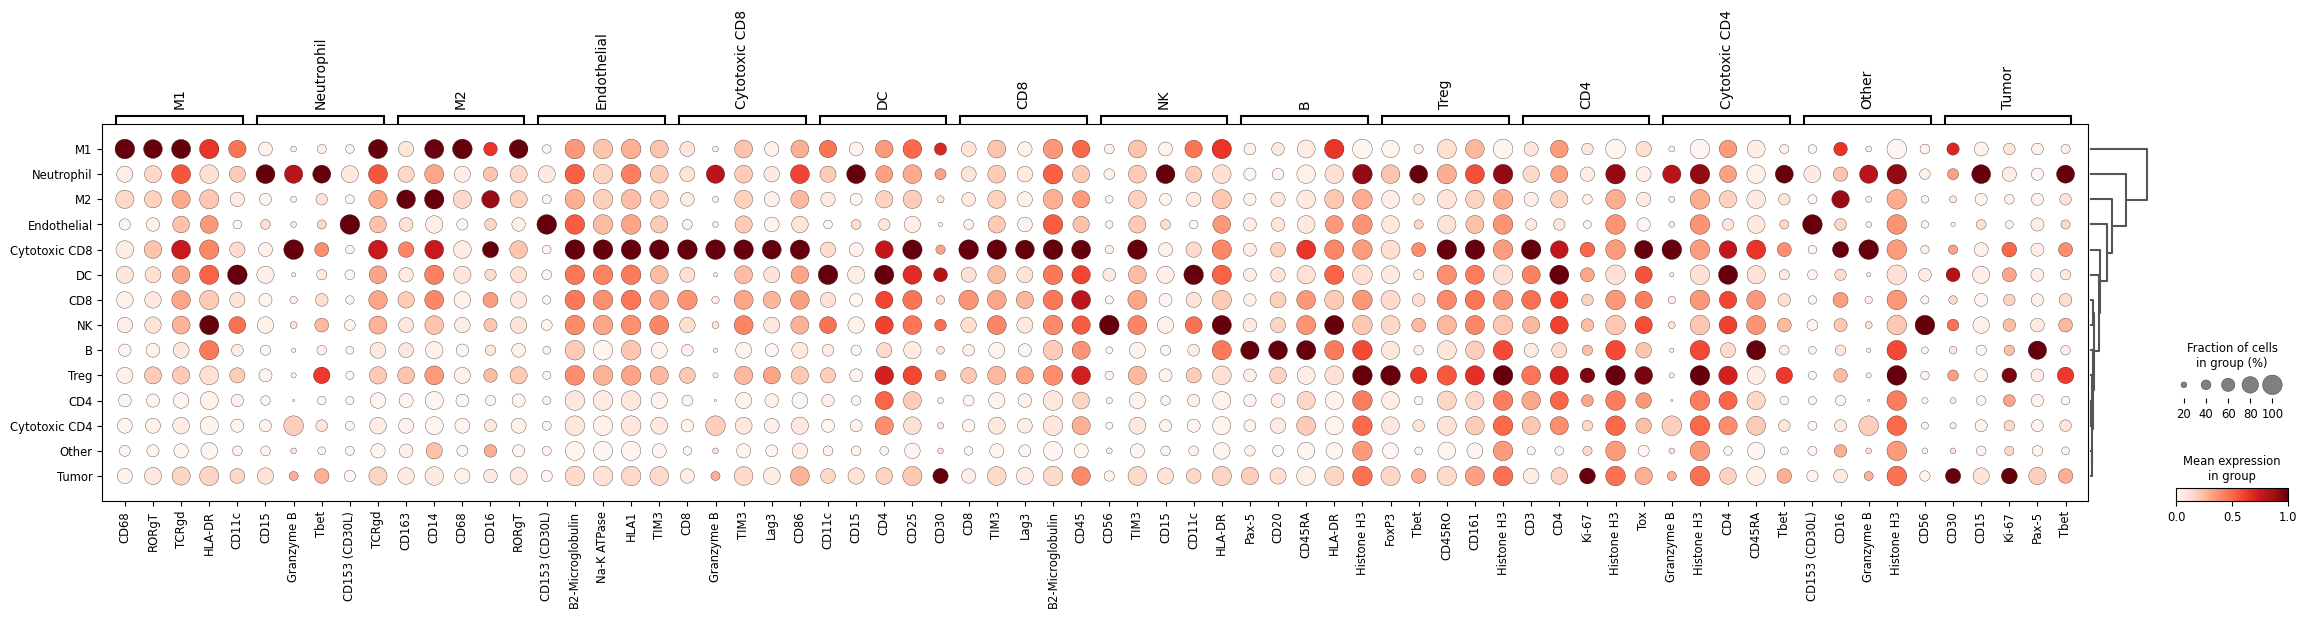

In [32]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, standard_scale='var', key='rank_genes_groups')

categories: B, CD4, CD8, etc.
var_group_labels: B, CD8, Cytotoxic CD4, etc.


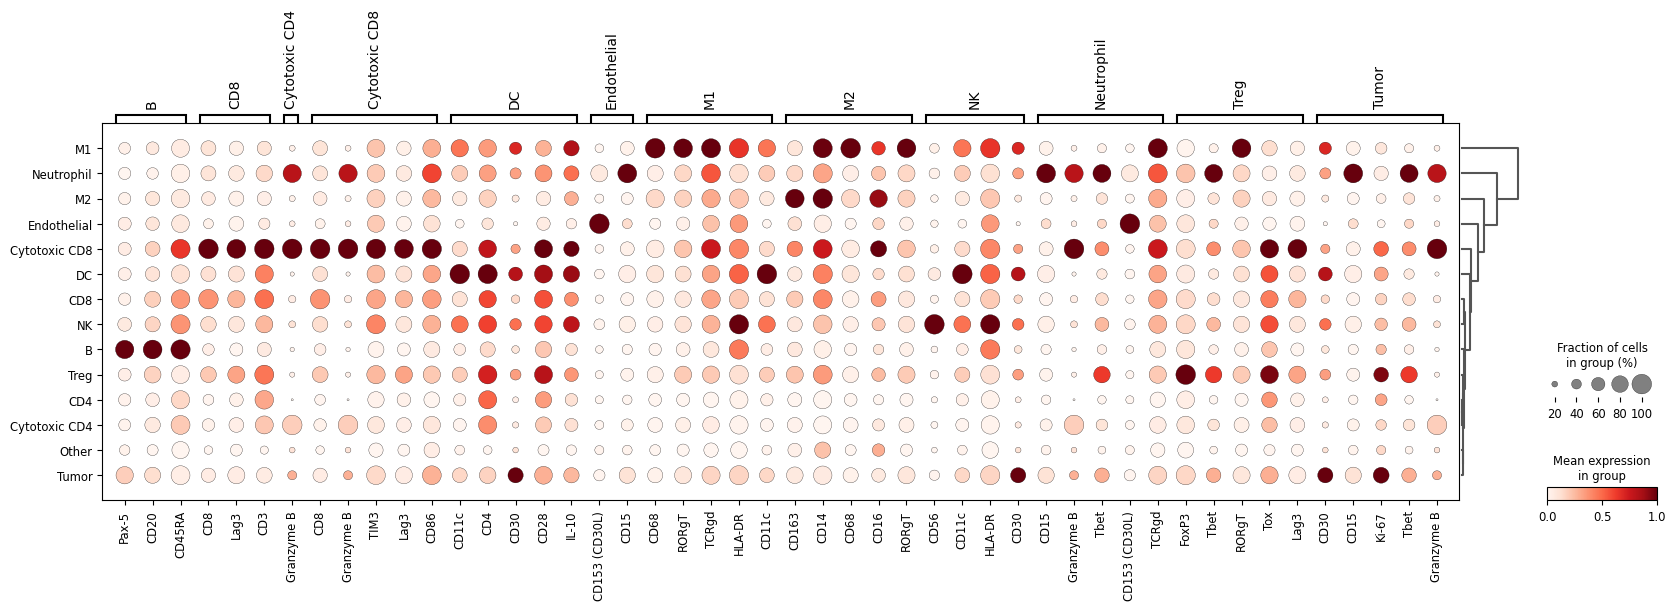

In [33]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, standard_scale='var', key='rank_genes_groups_filtered')